d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\Users\epiph\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\Users\epiph\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\Users\epiph\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\Users\epiph\anaconda3\Li

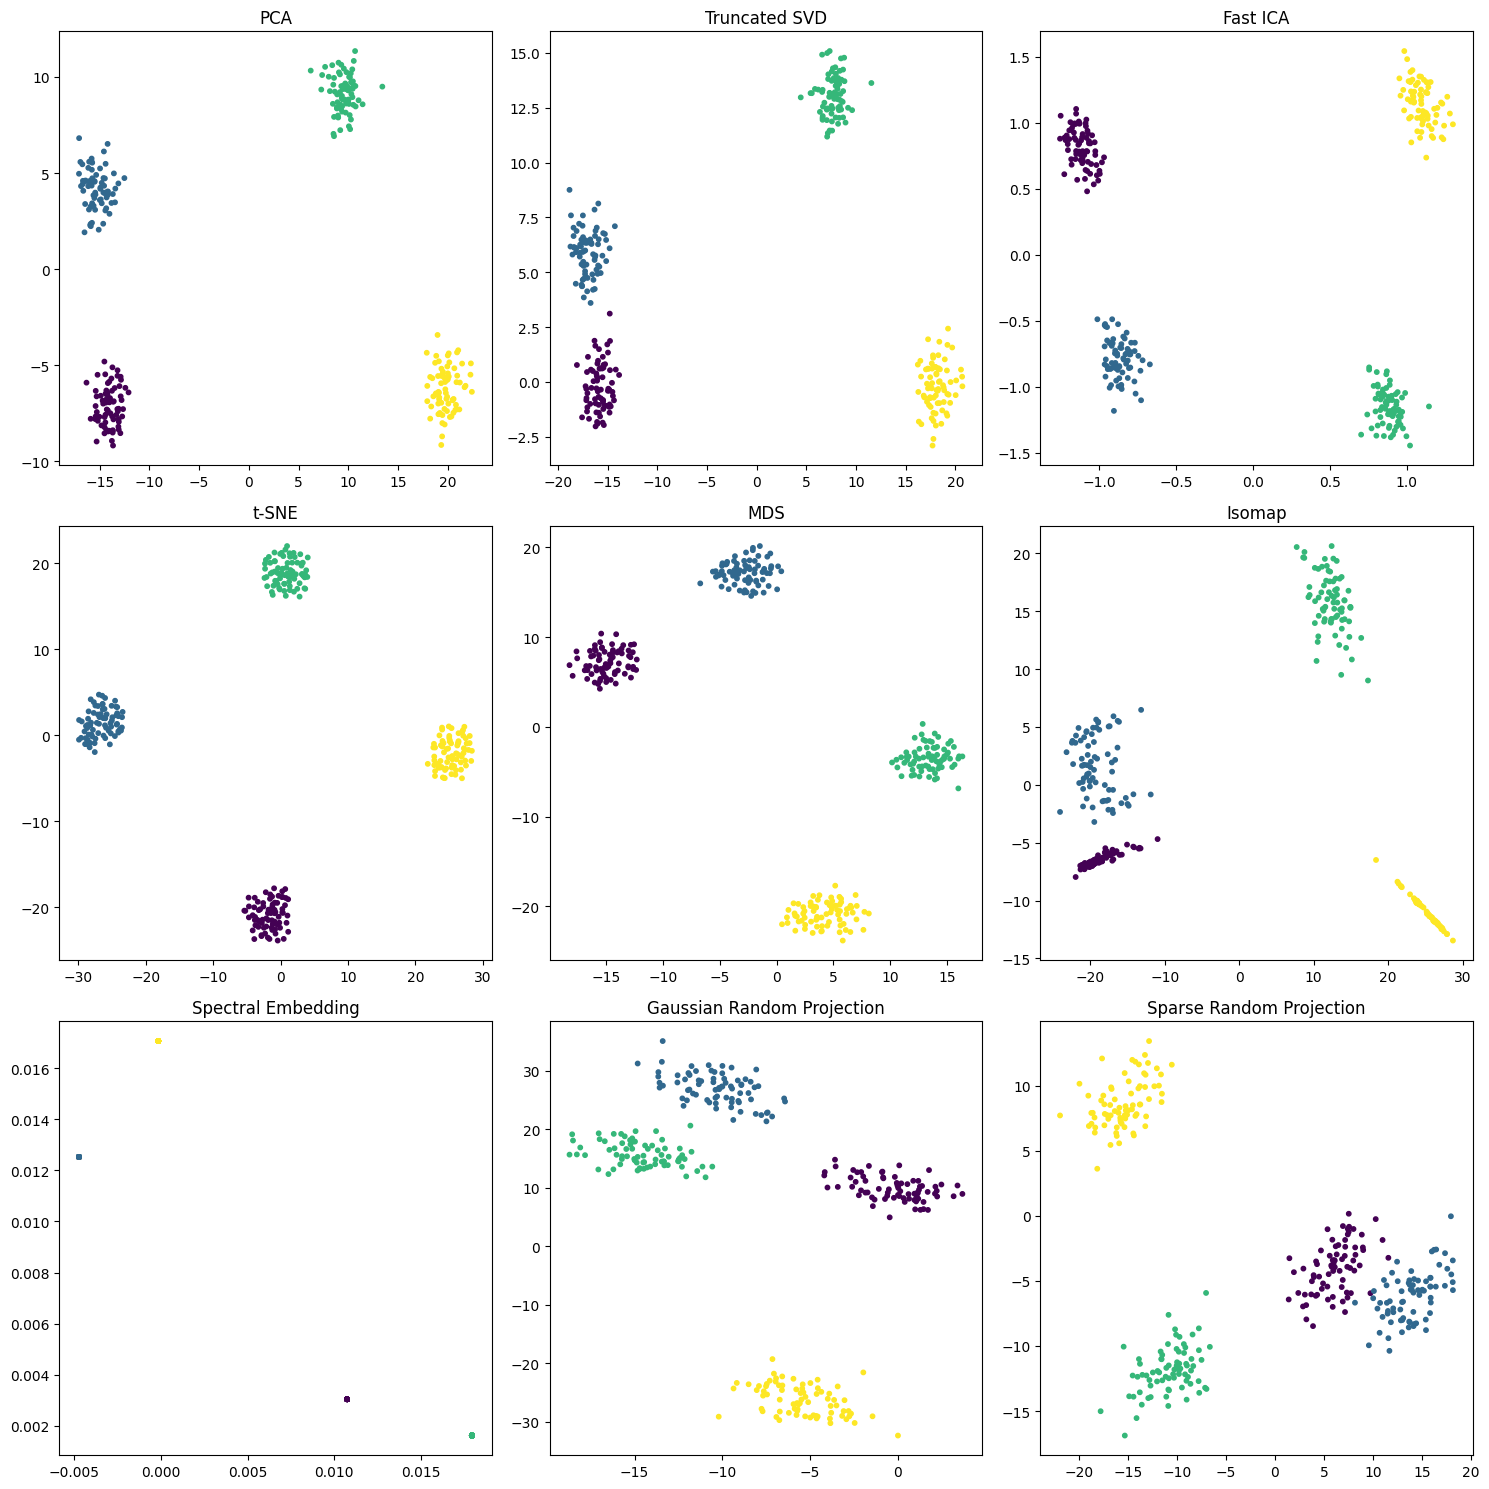

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
from sklearn.manifold import TSNE, MDS, Isomap, SpectralEmbedding
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection
from sklearn.decomposition import LatentDirichletAllocation

# Generate synthetic high-dimensional data
X, y = make_blobs(n_samples=300, n_features=10, centers=4, random_state=42)

# List of dimensionality reduction techniques
methods = {
    'PCA': PCA(n_components=2),
    'Truncated SVD': TruncatedSVD(n_components=2),
    'Fast ICA': FastICA(n_components=2, random_state=42),
    't-SNE': TSNE(n_components=2, random_state=42),
    'MDS': MDS(n_components=2, random_state=42),
    'Isomap': Isomap(n_components=2),
    'Spectral Embedding': SpectralEmbedding(n_components=2, random_state=42),
    'Gaussian Random Projection': GaussianRandomProjection(n_components=2, random_state=42),
    'Sparse Random Projection': SparseRandomProjection(n_components=2, random_state=42),
}

# Plot results of each method
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, (name, model) in enumerate(methods.items()):
    try:
        X_transformed = model.fit_transform(X)
        axes[i].scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', s=10)
        axes[i].set_title(name)
    except Exception as e:
        axes[i].text(0.5, 0.5, f"Failed: {e}", ha='center', va='center', fontsize=10)
        axes[i].set_title(name)

for j in range(len(methods), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


以下是代码中提到的降维算法的简要介绍以及它们的适用场景：

---

### 1. **PCA（Principal Component Analysis）**
   - **算法简介**：
     PCA 是一种线性降维技术，通过寻找数据的主要方差方向（主成分）来将高维数据映射到低维空间。
     它基于特征协方差矩阵的特征值分解或奇异值分解（SVD）。
   - **适用场景**：
     - 数据分布呈现线性关系。
     - 希望快速降低维度，同时保留数据中的主要信息。
     - 数据噪声较少。

---

### 2. **Truncated SVD（Truncated Singular Value Decomposition）**
   - **算法简介**：
     Truncated SVD 是 SVD 的变体，专为稀疏矩阵（如文本数据的词袋表示）设计。
     它适用于稀疏输入，并通过仅保留前几个奇异值来降低维度。
   - **适用场景**：
     - 文本数据分析，例如用于词向量降维的 Latent Semantic Analysis (LSA)。
     - 大规模稀疏数据降维。

---

### 3. **Fast ICA（Independent Component Analysis）**
   - **算法简介**：
     Fast ICA 是一种寻找数据独立成分的非线性降维技术，目标是使投影后的数据尽可能独立（最大化非高斯性）。
   - **适用场景**：
     - 数据可能由多个混合信号组成，需要提取独立源。
     - 应用于信号处理（如音频分离）。

---

### 4. **t-SNE（t-Distributed Stochastic Neighbor Embedding）**
   - **算法简介**：
     t-SNE 是一种非线性降维技术，通过最小化高维空间和低维空间中点对相似性的散度来保持局部邻域结构。
     它特别适合于可视化。
   - **适用场景**：
     - 数据存在复杂的非线性结构。
     - 数据可视化需求（通常降维到 2D 或 3D）。

---

### 5. **MDS（Multidimensional Scaling）**
   - **算法简介**：
     MDS 是一种保持样本间距离关系的降维方法，通过优化低维空间中样本之间的距离来匹配原始高维空间中的距离。
   - **适用场景**：
     - 数据具有明确的距离或相似性度量。
     - 用于理解数据中的全局结构。

---

### 6. **Isomap**
   - **算法简介**：
     Isomap 是一种基于图的非线性降维方法，通过保持数据流形的几何结构来降维。
     它通过构建最近邻图和计算最短路径来逼近数据的流形距离。
   - **适用场景**：
     - 数据分布在复杂的非线性流形上。
     - 希望保留数据的全局几何结构。

---

### 7. **Spectral Embedding（Laplacian Eigenmaps）**
   - **算法简介**：
     Spectral Embedding 使用图拉普拉斯特征值分解，寻找数据在图形上的流形结构，并将其映射到低维空间。
   - **适用场景**：
     - 数据分布在非线性流形上。
     - 用于聚类前的降维。

---

### 8. **Gaussian Random Projection**
   - **算法简介**：
     通过随机高斯矩阵对数据进行投影，利用 Johnson-Lindenstrauss 引理来保证投影后距离大致保持。
   - **适用场景**：
     - 需要快速降维。
     - 数据的全局结构不严格要求保持。

---

### 9. **Sparse Random Projection**
   - **算法简介**：
     类似于 Gaussian Random Projection，但使用稀疏矩阵以减少计算开销和存储成本。
   - **适用场景**：
     - 高维稀疏数据。
     - 希望降低内存和计算成本。

---

### 总结适用场景：

| 方法                  | 线性数据 | 非线性数据 | 文本数据 | 稀疏数据 | 可视化需求 |
|-----------------------|----------|------------|----------|----------|------------|
| PCA                   | ✔️        | ❌          | ✔️        | ✔️        | ❌          |
| Truncated SVD         | ✔️        | ❌          | ✔️        | ✔️        | ❌          |
| Fast ICA              | ❌        | ✔️          | ❌        | ✔️        | ❌          |
| t-SNE                 | ❌        | ✔️          | ✔️        | ❌        | ✔️          |
| MDS                   | ✔️        | ✔️          | ❌        | ❌        | ✔️          |
| Isomap                | ❌        | ✔️          | ❌        | ❌        | ✔️          |
| Spectral Embedding    | ❌        | ✔️          | ❌        | ❌        | ✔️          |
| Gaussian Random Projection | ✔️        | ❌          | ✔️        | ✔️        | ❌          |
| Sparse Random Projection  | ✔️        | ❌          | ✔️        | ✔️        | ❌          |